# <font color = "green" > Load Libraries and Data </font>

### Libraries

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading Data --> Line 1 or Line 2

In [2]:
df_raw_1 = pd.read_csv("/Users/constancabraga/Desktop/IE University/TERM 3/Captsone Project/Gestamp/line1.csv")

# <font color = "green" > Exploratory Data Analysis </font>

In [3]:
df_raw_1.head()

,TimeStamp,SignalName,Value
0,2022-01-01 00:00:08.190773,oil_level_1,5716.2188
1,2022-01-01 00:00:11.004477,oil_level_1,5715.0
2,2022-01-01 00:00:12.386434,oil_level_1,5717.0312
3,2022-01-01 00:00:13.761420,oil_level_1,5716.2188
4,2022-01-01 00:00:15.518799,oil_level_1,5717.0312


In [4]:
df_raw_1.columns

Index(['TimeStamp', 'SignalName', 'Value'], dtype='object')

In [5]:
df_raw_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683669 entries, 0 to 10683668
Data columns (total 3 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   TimeStamp   object
 1   SignalName  object
 2   Value       object
dtypes: object(3)
memory usage: 244.5+ MB


### Check the shape of the data

In [6]:
# What does this dataset look like?
print(f"Number of features: {df_raw_1.shape[1]}")
print(f"Number of rows: {df_raw_1.shape[0]}")

Number of features: 3
Number of rows: 10683669


# <font color = "green" > Data Preparation </font>

### Convert TimeStamp into datetime format

In [7]:
df_raw_1['TimeStamp'] = pd.to_datetime(df_raw_1['TimeStamp'], infer_datetime_format=True)

In [8]:
df_raw_1['Time'] = df_raw_1['TimeStamp'].dt.time

In [9]:
df_raw_1.head()

,TimeStamp,SignalName,Value,Time
0,2022-01-01 00:00:08.190773,oil_level_1,5716.2188,00:00:08.190773
1,2022-01-01 00:00:11.004477,oil_level_1,5715.0,00:00:11.004477
2,2022-01-01 00:00:12.386434,oil_level_1,5717.0312,00:00:12.386434
3,2022-01-01 00:00:13.761420,oil_level_1,5716.2188,00:00:13.761420
4,2022-01-01 00:00:15.518799,oil_level_1,5717.0312,00:00:15.518799


### Function to create new columns for: Oil Level, Ref_1, Tank Oil Temp, Num Stroke

In [10]:
def func(x):
    list_signal = []
    counter = 0
    for c in df_raw_1["SignalName"]:
        if x in c:
            list_signal.append(df_raw_1['Value'][counter])
        else:
            list_signal.append(None)
        counter = counter + 1
    df_raw_1[x] = list_signal


### Function to create boolean columns: Press Run, Main Pumps

In [11]:
def func2(x):
    list_signal = []
    counter = 0
    for c in df_raw_1["SignalName"]:
        if x in c:
            if df_raw_1['Value'][counter] == 'true':  
                list_signal.append('1')
            if df_raw_1['Value'][counter] == 'false': 
                list_signal.append('0')
        else:
            list_signal.append(None)
        counter = counter + 1
    df_raw_1[x] = list_signal

### Apply the functions

In [12]:
#Func 

func('oil_level_1')
func('ref_1')
func('tankoiltemp_1')
func('numstroke_1')

# Func2
func2('press_run_1')
func2('mainpumps_ok_1')

### Fill the Nulls with the right data (previous rows)

i. Convert the None's values into NaN's        
ii. Fill the NaN's with proper values

In [13]:
df_raw_1["mainpumps_ok_1"].fillna(value=np.nan, inplace=True)
df_raw_1["mainpumps_ok_1"]=df_raw_1["mainpumps_ok_1"].fillna(method='ffill')

df_raw_1["press_run_1"].fillna(value=np.nan, inplace=True)
df_raw_1["press_run_1"]=df_raw_1["press_run_1"].fillna(method='ffill')

df_raw_1["ref_1"].fillna(value=np.nan, inplace=True)
df_raw_1["ref_1"]=df_raw_1["ref_1"].fillna(method='ffill')

df_raw_1["numstroke_1"].fillna(value=np.nan, inplace=True)
df_raw_1["numstroke_1"]=df_raw_1["numstroke_1"].fillna(method='ffill')

df_raw_1["tankoiltemp_1"].fillna(value=np.nan, inplace=True)
df_raw_1["tankoiltemp_1"]=df_raw_1["tankoiltemp_1"].fillna(method='ffill')

df_raw_1["oil_level_1"]=df_raw_1["oil_level_1"].fillna(method='ffill')

#### There are rows that we can't fill using the 'ffil' because we don't have values on the previous rows, so we drop those rows

In [14]:
df_raw_1 = df_raw_1.dropna()

In [15]:
df_raw_1

,TimeStamp,SignalName,Value,Time,oil_level_1,ref_1,tankoiltemp_1,numstroke_1,press_run_1,mainpumps_ok_1
569053,2022-01-05 05:07:14.840804,ref_1,1,05:07:14.840804,5666.25,1,46,582605,0,1
569054,2022-01-05 05:07:15.043936,oil_level_1,5659.3438,05:07:15.043936,5659.3438,1,46,582605,0,1
569055,2022-01-05 05:07:16.239914,oil_level_1,5630.5,05:07:16.239914,5630.5,1,46,582605,0,1
569056,2022-01-05 05:07:17.649832,oil_level_1,5628.4688,05:07:17.649832,5628.4688,1,46,582605,0,1
569057,2022-01-05 05:07:18.024842,oil_level_1,5621.9688,05:07:18.024842,5621.9688,1,46,582605,0,1
...,...,...,...,...,...,...,...,...,...,...
10683664,2022-03-31 14:31:31.013587,oil_level_1,5709.3125,14:31:31.013587,5709.3125,6,45,47427,1,1
10683665,2022-03-31 14:31:31.393079,oil_level_1,5712.9688,14:31:31.393079,5712.9688,6,45,47427,1,1
10683666,2022-03-31 14:31:31.774115,oil_level_1,5762.9375,14:31:31.774115,5762.9375,6,45,47427,1,1
10683667,2022-03-31 14:31:32.145733,oil_level_1,5745.0625,14:31:32.145733,5745.0625,6,45,47427,1,1


### Delete the columns that are no longer needed
Columns that belong to the initial format that don't have meaningful infromation for us, once we have the new format

In [16]:
del df_raw_1['SignalName']
del df_raw_1['Value']

In [17]:
df_raw_1

,TimeStamp,Time,oil_level_1,ref_1,tankoiltemp_1,numstroke_1,press_run_1,mainpumps_ok_1
569053,2022-01-05 05:07:14.840804,05:07:14.840804,5666.25,1,46,582605,0,1
569054,2022-01-05 05:07:15.043936,05:07:15.043936,5659.3438,1,46,582605,0,1
569055,2022-01-05 05:07:16.239914,05:07:16.239914,5630.5,1,46,582605,0,1
569056,2022-01-05 05:07:17.649832,05:07:17.649832,5628.4688,1,46,582605,0,1
569057,2022-01-05 05:07:18.024842,05:07:18.024842,5621.9688,1,46,582605,0,1
...,...,...,...,...,...,...,...,...
10683664,2022-03-31 14:31:31.013587,14:31:31.013587,5709.3125,6,45,47427,1,1
10683665,2022-03-31 14:31:31.393079,14:31:31.393079,5712.9688,6,45,47427,1,1
10683666,2022-03-31 14:31:31.774115,14:31:31.774115,5762.9375,6,45,47427,1,1
10683667,2022-03-31 14:31:32.145733,14:31:32.145733,5745.0625,6,45,47427,1,1


## Change the columns format to the right one

In [18]:
# Oil Level, Tank Oil Temp, Num Stroke to numeric (so we can plot and use the data)

df_raw_1["oil_level_1"] = pd.to_numeric(df_raw_1["oil_level_1"])
df_raw_1["tankoiltemp_1"] = pd.to_numeric(df_raw_1["tankoiltemp_1"])
df_raw_1["numstroke_1"] = pd.to_numeric(df_raw_1["numstroke_1"])

In [19]:
df_raw_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10114616 entries, 569053 to 10683668
Data columns (total 8 columns):
 #   Column          Dtype         
---  ------          -----         
 0   TimeStamp       datetime64[ns]
 1   Time            object        
 2   oil_level_1     float64       
 3   ref_1           object        
 4   tankoiltemp_1   int64         
 5   numstroke_1     int64         
 6   press_run_1     object        
 7   mainpumps_ok_1  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 694.5+ MB


# <font color = "green" > Create a Dataset with meaningful variables </font>

### Important columns to include in the new Dataset: Ref_1, Numstroke_1, Oil_level_1, Mainpumps_ok_1

In [20]:
df = pd.DataFrame(df_raw_1, columns = ['TimeStamp','ref_1','numstroke_1', 'oil_level_1', 'mainpumps_ok_1'])

#### Change some formats in this Dataset

Change mainpumps to integer, for future computations

In [21]:
df['mainpumps_ok_1'] = df['mainpumps_ok_1'].astype('int')

### Create "ProductionID" Column - ID to each Ref_1 change

In [22]:
i = df.ref_1
df['ProductionID'] = i.ne(i.shift()).cumsum()

In [23]:
df

,TimeStamp,ref_1,numstroke_1,oil_level_1,mainpumps_ok_1,ProductionID
569053,2022-01-05 05:07:14.840804,1,582605,5666.2500,1,1
569054,2022-01-05 05:07:15.043936,1,582605,5659.3438,1,1
569055,2022-01-05 05:07:16.239914,1,582605,5630.5000,1,1
569056,2022-01-05 05:07:17.649832,1,582605,5628.4688,1,1
569057,2022-01-05 05:07:18.024842,1,582605,5621.9688,1,1
...,...,...,...,...,...,...
10683664,2022-03-31 14:31:31.013587,6,47427,5709.3125,1,54
10683665,2022-03-31 14:31:31.393079,6,47427,5712.9688,1,54
10683666,2022-03-31 14:31:31.774115,6,47427,5762.9375,1,54
10683667,2022-03-31 14:31:32.145733,6,47427,5745.0625,1,54


# <font color = "green" > Feature Engineering </font>

## Create a new Dataset - GROUP BY 'ProductionID' and 'Numstroke_1'

Apply statistical measures to Oil_level_1 to each combination of ProductionID and Numstroke

In [24]:
df_1 = df.groupby(['ProductionID','numstroke_1'], as_index=False)['oil_level_1'].agg(['mean', 'std', 'var', 'median', 'max', 'min'])

df_1

mean        std          var      median  \
ProductionID numstroke_1                                                    
1            582605       5652.088592  26.419722   698.001720  5656.90620   
2            582605       5628.658522  46.842927  2194.259838  5658.53120   
             582606       5604.163909  33.370231  1113.572331  5587.84380   
             582607       5534.202816  56.092055  3146.318652  5565.90620   
             582608       5570.139403  39.230098  1539.000571  5581.34380   
...                               ...        ...          ...         ...   
54           47423        5660.613278  75.893746  5759.860698  5626.64065   
             47424        5661.128791  67.929282  4614.387323  5641.87500   
             47425        5657.587318  70.649043  4991.287232  5623.39060   
             47426        5668.154297  70.841235  5018.480578  5666.45315   
             47427        5654.321030  66.562341  4430.545277  5627.25000   

                                max        min  
ProductionID numstroke_1                        
1            582605       5697.5312  5398.9375  
2            582605       5664.6250  5498.8750  
             582606       5705.2500  5450.9375  
             582607       5602.8750  5370.9062  
             582608       5620.7500  5376.5938  
...                             ...        ...  
54           47423        5801.5312  5567.1250  
             47424        5792.1875  5574.8438  
             47425        5808.0312  5565.0938  
             47426        5797.8750  5572.8125  
             47427        5792.1875  5569.1562  

[221469 rows x 6 columns]

In [25]:
df_1 = df_1.reset_index()

### Create the TimeStamp Column

In [26]:
df_time = df.groupby(['ProductionID','numstroke_1'], as_index=False)['TimeStamp'].min()

df_time

,ProductionID,numstroke_1,TimeStamp
0,1,582605,2022-01-05 05:07:14.840804
1,2,582605,2022-01-05 18:07:32.506133
2,2,582606,2022-01-05 18:10:09.762761
3,2,582607,2022-01-09 21:11:27.190871
4,2,582608,2022-01-09 21:16:16.975409
...,...,...,...
221464,54,47423,2022-03-31 14:30:30.856844
221465,54,47424,2022-03-31 14:30:42.524792
221466,54,47425,2022-03-31 14:30:55.243951
221467,54,47426,2022-03-31 14:31:08.006378


In [27]:
df_1 = pd.merge(df_time,df_1,how='outer',on=['ProductionID', 'numstroke_1'])

In [28]:
first_column = df_1.pop('TimeStamp')

In [29]:
df_1.insert(0, 'TimeStamp', first_column)

In [30]:
df_1

,TimeStamp,ProductionID,numstroke_1,mean,std,var,median,max,min
0,2022-01-05 05:07:14.840804,1,582605,5652.088592,26.419722,698.001720,5656.90620,5697.5312,5398.9375
1,2022-01-05 18:07:32.506133,2,582605,5628.658522,46.842927,2194.259838,5658.53120,5664.6250,5498.8750
2,2022-01-05 18:10:09.762761,2,582606,5604.163909,33.370231,1113.572331,5587.84380,5705.2500,5450.9375
3,2022-01-09 21:11:27.190871,2,582607,5534.202816,56.092055,3146.318652,5565.90620,5602.8750,5370.9062
4,2022-01-09 21:16:16.975409,2,582608,5570.139403,39.230098,1539.000571,5581.34380,5620.7500,5376.5938
...,...,...,...,...,...,...,...,...,...
221464,2022-03-31 14:30:30.856844,54,47423,5660.613278,75.893746,5759.860698,5626.64065,5801.5312,5567.1250
221465,2022-03-31 14:30:42.524792,54,47424,5661.128791,67.929282,4614.387323,5641.87500,5792.1875,5574.8438
221466,2022-03-31 14:30:55.243951,54,47425,5657.587318,70.649043,4991.287232,5623.39060,5808.0312,5565.0938
221467,2022-03-31 14:31:08.006378,54,47426,5668.154297,70.841235,5018.480578,5666.45315,5797.8750,5572.8125


### Create one Column for Q1 and Q3  - Oil Level

One aux df for Quantile 1 and another for Quantile 3:

In [31]:
df_2 = df.groupby(['ProductionID','numstroke_1'], as_index=False)['oil_level_1'].quantile(0.25)

df_3 = df.groupby(['ProductionID','numstroke_1'], as_index=False)['oil_level_1'].quantile(0.75)

Adding the Q1 and Q3 to the df_1:

In [32]:
df_1['Q1'] = df_2['oil_level_1']

df_1['Q3'] = df_3['oil_level_1']

In [33]:
df_1

,TimeStamp,ProductionID,numstroke_1,mean,std,var,median,max,min,Q1,Q3
0,2022-01-05 05:07:14.840804,1,582605,5652.088592,26.419722,698.001720,5656.90620,5697.5312,5398.9375,5637.40620,5673.562500
1,2022-01-05 18:07:32.506133,2,582605,5628.658522,46.842927,2194.259838,5658.53120,5664.6250,5498.8750,5607.34380,5660.562500
2,2022-01-05 18:10:09.762761,2,582606,5604.163909,33.370231,1113.572331,5587.84380,5705.2500,5450.9375,5580.12500,5622.781200
3,2022-01-09 21:11:27.190871,2,582607,5534.202816,56.092055,3146.318652,5565.90620,5602.8750,5370.9062,5494.40620,5575.960925
4,2022-01-09 21:16:16.975409,2,582608,5570.139403,39.230098,1539.000571,5581.34380,5620.7500,5376.5938,5579.31250,5582.968800
...,...,...,...,...,...,...,...,...,...,...,...
221464,2022-03-31 14:30:30.856844,54,47423,5660.613278,75.893746,5759.860698,5626.64065,5801.5312,5567.1250,5596.37500,5737.039025
221465,2022-03-31 14:30:42.524792,54,47424,5661.128791,67.929282,4614.387323,5641.87500,5792.1875,5574.8438,5602.87500,5718.656200
221466,2022-03-31 14:30:55.243951,54,47425,5657.587318,70.649043,4991.287232,5623.39060,5808.0312,5565.0938,5602.87500,5717.742150
221467,2022-03-31 14:31:08.006378,54,47426,5668.154297,70.841235,5018.480578,5666.45315,5797.8750,5572.8125,5602.36715,5730.945350


### Create a Column for the Mainpumps  based on the Group By condition

Create an aux dataset to perform the computations

In [34]:
df_4 = df.groupby(['ProductionID','numstroke_1'], as_index=False)['mainpumps_ok_1'].agg(['mean'])

In [35]:
df_4 = df_4.reset_index()

Establishing when we consider the mainpumps are working or not:

In [36]:
pumps_signal = []
for c in df_4["mean"]:
    if c == 1:
        pumps_signal.append('1')
        
    else:
        pumps_signal.append('0')
        
df_4['mainpumps_ok_1'] = pumps_signal

Adding this new column to the df1

In [37]:
df_1['mainpumps_ok_1'] = df_4['mainpumps_ok_1']

In [38]:
df_1

,TimeStamp,ProductionID,numstroke_1,mean,std,var,median,max,min,Q1,Q3,mainpumps_ok_1
0,2022-01-05 05:07:14.840804,1,582605,5652.088592,26.419722,698.001720,5656.90620,5697.5312,5398.9375,5637.40620,5673.562500,0
1,2022-01-05 18:07:32.506133,2,582605,5628.658522,46.842927,2194.259838,5658.53120,5664.6250,5498.8750,5607.34380,5660.562500,1
2,2022-01-05 18:10:09.762761,2,582606,5604.163909,33.370231,1113.572331,5587.84380,5705.2500,5450.9375,5580.12500,5622.781200,0
3,2022-01-09 21:11:27.190871,2,582607,5534.202816,56.092055,3146.318652,5565.90620,5602.8750,5370.9062,5494.40620,5575.960925,1
4,2022-01-09 21:16:16.975409,2,582608,5570.139403,39.230098,1539.000571,5581.34380,5620.7500,5376.5938,5579.31250,5582.968800,1
...,...,...,...,...,...,...,...,...,...,...,...,...
221464,2022-03-31 14:30:30.856844,54,47423,5660.613278,75.893746,5759.860698,5626.64065,5801.5312,5567.1250,5596.37500,5737.039025,1
221465,2022-03-31 14:30:42.524792,54,47424,5661.128791,67.929282,4614.387323,5641.87500,5792.1875,5574.8438,5602.87500,5718.656200,1
221466,2022-03-31 14:30:55.243951,54,47425,5657.587318,70.649043,4991.287232,5623.39060,5808.0312,5565.0938,5602.87500,5717.742150,1
221467,2022-03-31 14:31:08.006378,54,47426,5668.154297,70.841235,5018.480578,5666.45315,5797.8750,5572.8125,5602.36715,5730.945350,1


### Create a Column that counts the Pieces produced of each Ref_1

In [39]:
df_1["Pieces"] = df_1.groupby("ProductionID").cumcount()+1

In [40]:
df_1

,TimeStamp,ProductionID,numstroke_1,mean,std,var,median,max,min,Q1,Q3,mainpumps_ok_1,Pieces
0,2022-01-05 05:07:14.840804,1,582605,5652.088592,26.419722,698.001720,5656.90620,5697.5312,5398.9375,5637.40620,5673.562500,0,1
1,2022-01-05 18:07:32.506133,2,582605,5628.658522,46.842927,2194.259838,5658.53120,5664.6250,5498.8750,5607.34380,5660.562500,1,1
2,2022-01-05 18:10:09.762761,2,582606,5604.163909,33.370231,1113.572331,5587.84380,5705.2500,5450.9375,5580.12500,5622.781200,0,2
3,2022-01-09 21:11:27.190871,2,582607,5534.202816,56.092055,3146.318652,5565.90620,5602.8750,5370.9062,5494.40620,5575.960925,1,3
4,2022-01-09 21:16:16.975409,2,582608,5570.139403,39.230098,1539.000571,5581.34380,5620.7500,5376.5938,5579.31250,5582.968800,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
221464,2022-03-31 14:30:30.856844,54,47423,5660.613278,75.893746,5759.860698,5626.64065,5801.5312,5567.1250,5596.37500,5737.039025,1,2033
221465,2022-03-31 14:30:42.524792,54,47424,5661.128791,67.929282,4614.387323,5641.87500,5792.1875,5574.8438,5602.87500,5718.656200,1,2034
221466,2022-03-31 14:30:55.243951,54,47425,5657.587318,70.649043,4991.287232,5623.39060,5808.0312,5565.0938,5602.87500,5717.742150,1,2035
221467,2022-03-31 14:31:08.006378,54,47426,5668.154297,70.841235,5018.480578,5666.45315,5797.8750,5572.8125,5602.36715,5730.945350,1,2036


### Create a 'Warm_Up' Column that excluse the first 50 pieces from the analysis

-> Those pieces are not taken into consideration for the analysis 

In [41]:
lis = []

for i in df_1['Pieces']: 
    if i in range(1,51): 
        lis.append('0')
    else: 
        lis.append('1')

df_1['Warm_Up'] = lis

In [42]:
df_1

,TimeStamp,ProductionID,numstroke_1,mean,std,var,median,max,min,Q1,Q3,mainpumps_ok_1,Pieces,Warm_Up
0,2022-01-05 05:07:14.840804,1,582605,5652.088592,26.419722,698.001720,5656.90620,5697.5312,5398.9375,5637.40620,5673.562500,0,1,0
1,2022-01-05 18:07:32.506133,2,582605,5628.658522,46.842927,2194.259838,5658.53120,5664.6250,5498.8750,5607.34380,5660.562500,1,1,0
2,2022-01-05 18:10:09.762761,2,582606,5604.163909,33.370231,1113.572331,5587.84380,5705.2500,5450.9375,5580.12500,5622.781200,0,2,0
3,2022-01-09 21:11:27.190871,2,582607,5534.202816,56.092055,3146.318652,5565.90620,5602.8750,5370.9062,5494.40620,5575.960925,1,3,0
4,2022-01-09 21:16:16.975409,2,582608,5570.139403,39.230098,1539.000571,5581.34380,5620.7500,5376.5938,5579.31250,5582.968800,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221464,2022-03-31 14:30:30.856844,54,47423,5660.613278,75.893746,5759.860698,5626.64065,5801.5312,5567.1250,5596.37500,5737.039025,1,2033,1
221465,2022-03-31 14:30:42.524792,54,47424,5661.128791,67.929282,4614.387323,5641.87500,5792.1875,5574.8438,5602.87500,5718.656200,1,2034,1
221466,2022-03-31 14:30:55.243951,54,47425,5657.587318,70.649043,4991.287232,5623.39060,5808.0312,5565.0938,5602.87500,5717.742150,1,2035,1
221467,2022-03-31 14:31:08.006378,54,47426,5668.154297,70.841235,5018.480578,5666.45315,5797.8750,5572.8125,5602.36715,5730.945350,1,2036,1


# <font color = "green" > Oil Leak Analysis </font>

### Create a ComboID Column

#### Each combination of <span style="color:blue">ProductionID </span> and <span style="color:blue">MainPumps </span>  is unique and it is crucial to be able to compute the historical data of each piece
#### we only have historical data when <span style="color:green">(1)</span> We have the same ProductionID and <span style="color:green">(2)</span> The Mainpump is one

<span style="color:blue">ComboID Column</span> - restart the counter each time we ProductionID changes OR MainPump changes (only increase the counter if MainPump is one)

In [43]:
# To be able to work with it we need to have mainpumps in numeric format

df_1["mainpumps_ok_1"] = pd.to_numeric(df_1["mainpumps_ok_1"])

In [44]:
df_1['combo_id'] = pd.factorize(df_1.ProductionID+df_1.mainpumps_ok_1)[0]

In [45]:
df_1_test=df_1

In [46]:
i_prod = 1

combo_id = []

for j in df_1.index:
    if df_1['ProductionID'][j]!= i_prod or df_1['mainpumps_ok_1'][j] ==0:
        combo_id.append(0)
        if df_1['ProductionID'][j] != i_prod:
            i_prod = i_prod + 1
    else:
        if len(combo_id)==0:
            last = 0
            
        else:
            last = combo_id[len(combo_id)-1]
        combo_id.append(last+1)
        
        
df_1['combo_id'] = combo_id        

## Oil Limit column

Every single piece has "historical" data that helps us predicting its behavior.

Notice that each time the mainpump turns to zero, the algorithm restarts so there are some pieces that don't have historical informatioon (if the machine is not working, there isn't added information), that's why <span style="color:green">ComboID</span> is important. 

In [47]:
piece_df = df_1[(df_1['Pieces']==399) & (df_1['ProductionID']==24)]

In [48]:
piece_df = df_1.loc[[100]]
piece_df

,TimeStamp,ProductionID,numstroke_1,mean,std,var,median,max,min,Q1,Q3,mainpumps_ok_1,Pieces,Warm_Up,combo_id
100,2022-01-09 21:55:41.866122,2,582704,5519.61696,74.951743,5617.763793,5492.375,5681.2812,5430.625,5460.2812,5594.1406,1,100,1,98


In [49]:
c = piece_df['combo_id'].values[0]-1
c

97

In [50]:
minim = min(c, 100)

minim

97

In [51]:
last_piece = piece_df.index.values[0]-1
last_piece

99

In [52]:
first_piece = last_piece-minim
first_piece

2

In [53]:
oil_limit_list = []
for x in df_1.index:
    piece_df = df_1.loc[[x]] #Piece to predict
    if piece_df['combo_id'].values[0] > 50: #Calculate oil_limit only for pieces for prediction
        c = piece_df['combo_id'].values[0]-1
        minim = min(c, 100)
        last_piece = piece_df.index.values[0]-1
        first_piece = last_piece-minim+1
        
        aux_df = df_1.loc[first_piece:last_piece] #Filter pieces for prediction
        
        mean = aux_df['mean'].mean()
        std = aux_df['std'].mean()
        oil_limit = mean-50
        oil_limit_list.append(oil_limit)
    else:
        oil_limit_list.append(-1) #Add nan if the piece won't be predicted
        
df_1['oil_limit'] = oil_limit_list

(5000.0, 6000.0)

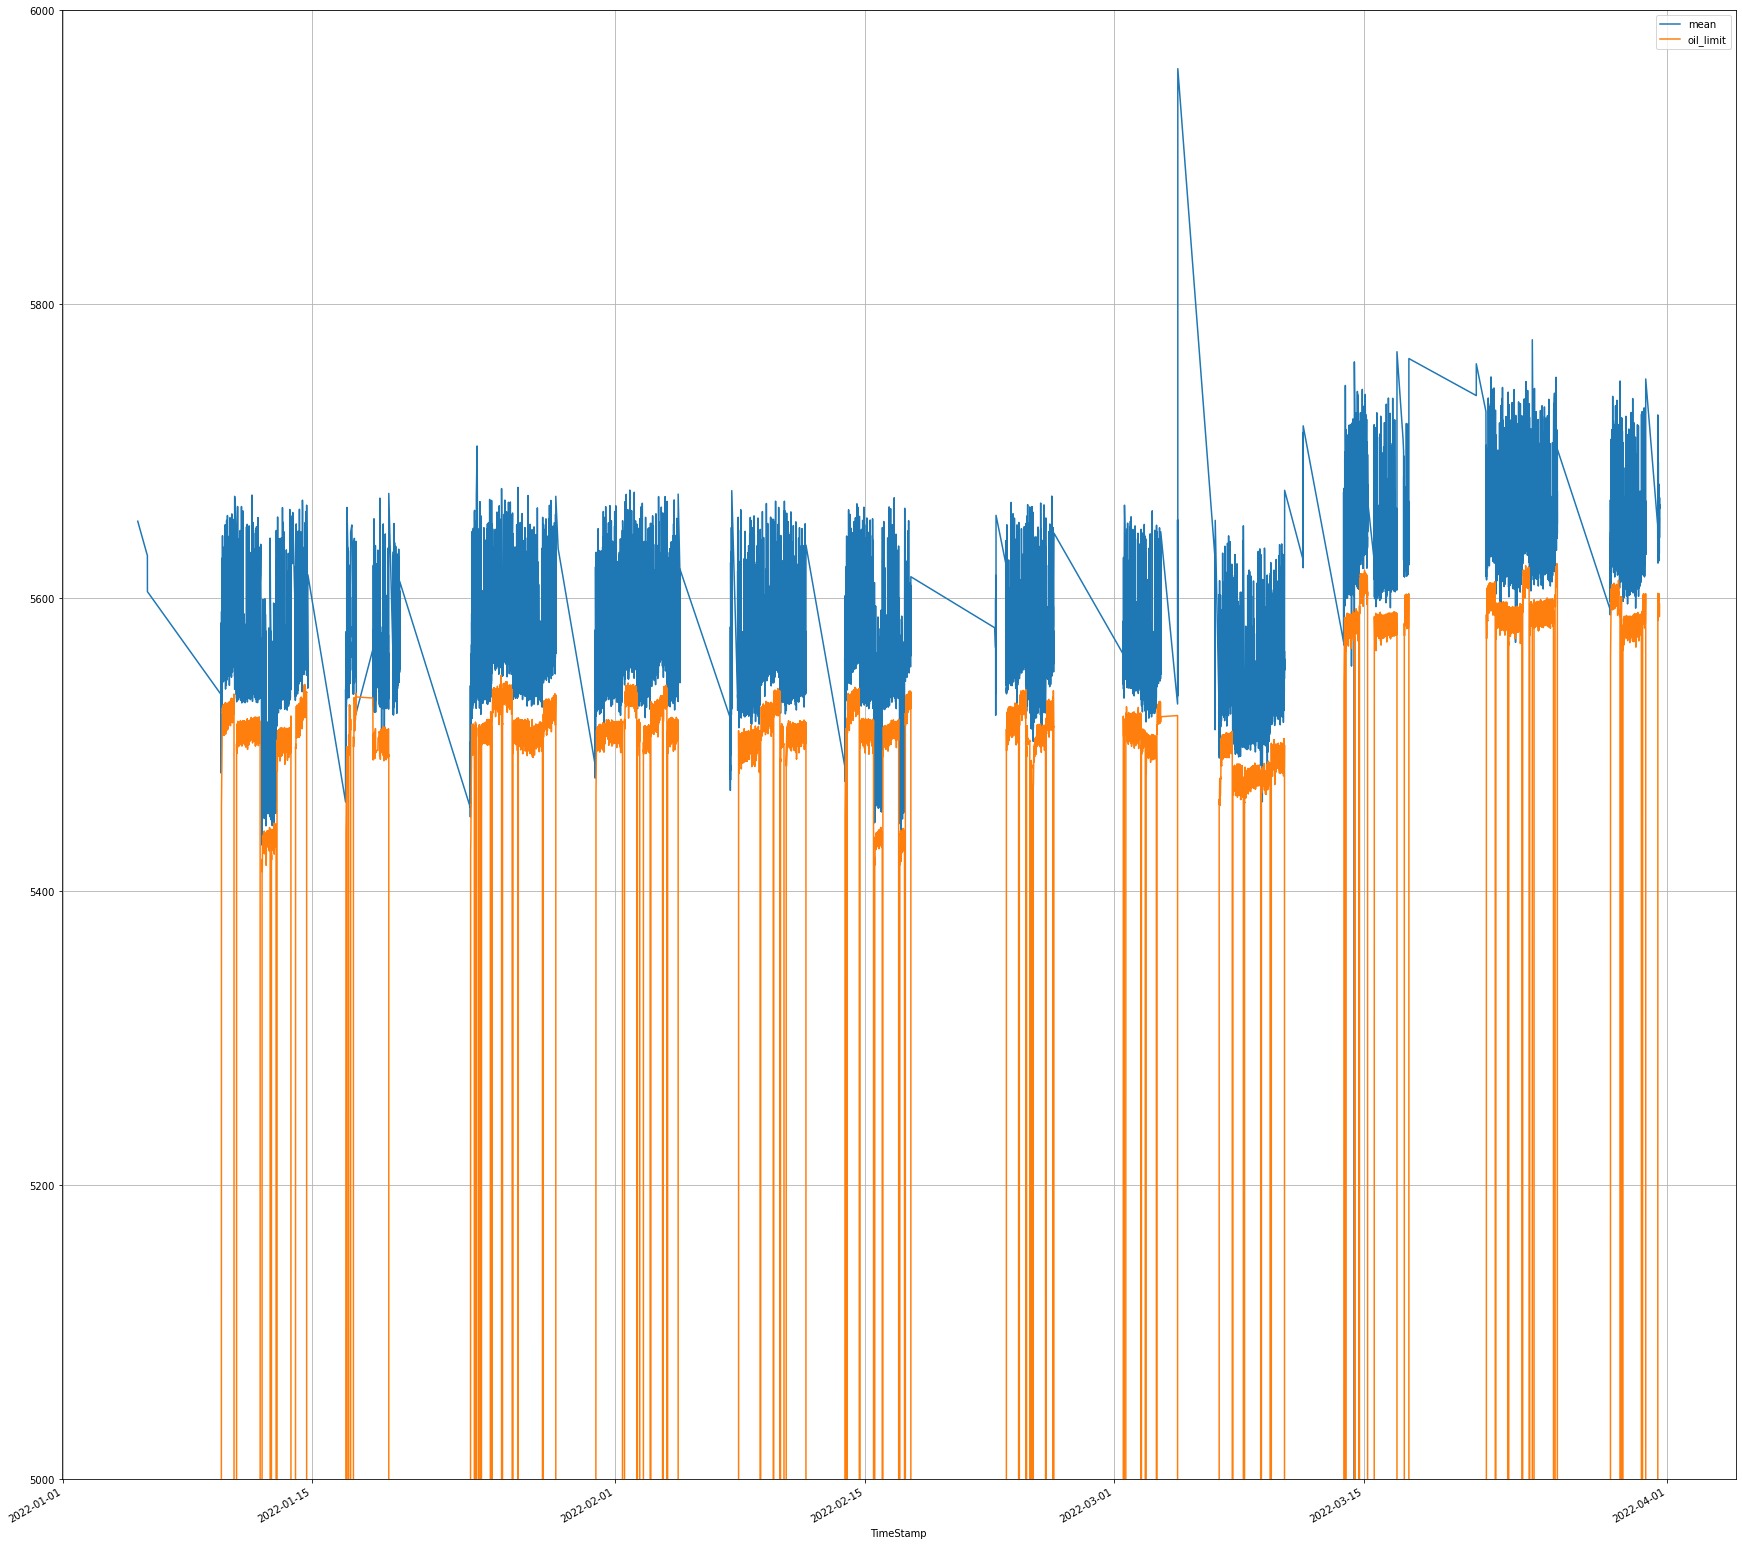

In [54]:
df_1.plot(x='TimeStamp', y=['mean', 'oil_limit'], figsize=(30,30), grid=True)
plt.ylim(5000, 6000)

In [55]:
df_1[df_1['oil_limit']== -1]

,TimeStamp,ProductionID,numstroke_1,mean,std,var,median,max,min,Q1,Q3,mainpumps_ok_1,Pieces,Warm_Up,combo_id,oil_limit
0,2022-01-05 05:07:14.840804,1,582605,5652.088592,26.419722,698.001720,5656.90620,5697.5312,5398.9375,5637.406200,5673.562500,0,1,0,0,-1.0
1,2022-01-05 18:07:32.506133,2,582605,5628.658522,46.842927,2194.259838,5658.53120,5664.6250,5498.8750,5607.343800,5660.562500,1,1,0,0,-1.0
2,2022-01-05 18:10:09.762761,2,582606,5604.163909,33.370231,1113.572331,5587.84380,5705.2500,5450.9375,5580.125000,5622.781200,0,2,0,0,-1.0
3,2022-01-09 21:11:27.190871,2,582607,5534.202816,56.092055,3146.318652,5565.90620,5602.8750,5370.9062,5494.406200,5575.960925,1,3,0,1,-1.0
4,2022-01-09 21:16:16.975409,2,582608,5570.139403,39.230098,1539.000571,5581.34380,5620.7500,5376.5938,5579.312500,5582.968800,1,4,0,2,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220814,2022-03-31 12:08:25.697593,54,46773,5651.002925,73.350645,5380.317063,5608.35935,5790.9688,5567.9375,5589.062550,5734.296850,1,1383,1,46,-1.0
220815,2022-03-31 12:08:38.662621,54,46774,5655.111981,72.763213,5294.485094,5618.31250,5783.2500,5557.3750,5596.171875,5729.625000,1,1384,1,47,-1.0
220816,2022-03-31 12:08:51.277785,54,46775,5652.107413,69.849433,4878.943267,5619.53120,5788.9375,5563.8750,5598.812450,5721.398475,1,1385,1,48,-1.0
220817,2022-03-31 12:09:03.174623,54,46776,5661.362303,72.528806,5260.427652,5623.79685,5788.9375,5557.3750,5593.125000,5730.539050,1,1386,1,49,-1.0


## Create Oil Leak Column

#### We have an <span style="color:green">oil leak</span> when the mean value is lower than the oil limit

Exception for the values that are <span style="color:red">(-1)</span>, because that represents when the machine is not working, so we don't send an alert signal in those cases

In [56]:
oil_leak_list = []

for x in df_1.index:
    piece_df = df_1.loc[[x]]
    if piece_df['oil_limit'].values[0]== -1:
        oil_leak_list.append(0)
        
    elif piece_df['oil_limit'].values[0]>=piece_df['mean'].values[0]:
        oil_leak_list.append(1)
        
    else:
        oil_leak_list.append(0)

df_1['oil_leak'] = oil_leak_list        

In [57]:
df_1[df_1['oil_leak']==1]

,TimeStamp,ProductionID,numstroke_1,mean,std,var,median,max,min,Q1,Q3,mainpumps_ok_1,Pieces,Warm_Up,combo_id,oil_limit,oil_leak
15508,2022-01-12 20:37:35.792188,7,598261,5444.679046,97.822751,9569.290656,5435.90620,5662.1875,5299.4062,5359.531200,5500.500000,1,771,1,770,5445.433965,1
25759,2022-01-17 11:27:05.645747,10,608516,5521.883536,81.393537,6624.907876,5496.84380,5658.9375,5441.5938,5451.343700,5578.703150,1,1013,1,1012,5532.443204,1
27620,2022-01-18 21:31:27.672122,10,615393,5496.630943,29.152116,849.845841,5496.84380,5533.4062,5435.5000,5475.312500,5522.437500,1,2874,1,2873,5498.021107,1
28537,2022-01-19 01:12:15.069606,10,616352,5489.802067,14.587354,212.790906,5495.21880,5500.9062,5473.2812,5484.250000,5498.062500,1,3791,1,3790,5511.146373,1
121944,2022-02-17 00:43:42.925658,28,714451,5432.326849,94.915682,9008.986730,5416.81250,5626.8438,5309.1562,5347.343800,5493.187500,1,295,1,294,5432.568176,1
164413,2022-03-09 07:32:44.716897,38,770895,5461.066667,59.118889,3495.043090,5464.75000,5549.2500,5374.9688,5408.484350,5496.843800,1,9498,1,378,5474.082322,1
173324,2022-03-14 07:38:18.309686,40,779911,5553.470489,38.768578,1503.002652,5546.40625,5658.5312,5498.4688,5528.226600,5580.429725,1,2341,1,1849,5581.595900,1
192087,2022-03-22 16:18:48.359570,49,17968,5578.364578,39.150990,1532.799982,5592.31250,5626.8438,5526.0938,5538.281200,5608.562500,1,1688,1,1687,5580.326055,1
196818,2022-03-23 12:34:26.978709,49,22706,5569.599423,48.119117,2315.449418,5576.46875,5678.4375,5500.5000,5525.484375,5601.148400,1,6419,1,2281,5574.081852,1
197403,2022-03-23 14:43:48.711357,49,23295,5580.173752,75.369801,5680.606902,5575.25000,5786.9062,5483.0312,5526.500000,5605.312500,1,7004,1,2866,5586.909903,1


## Create Leak Alarm Column

#### Whe need this column in order to just send a Leak Alert when we get the first oil leak (in case we gave consecutive leaks

In [58]:
df_1['leak_id'] = df_1.oil_leak != df_1.oil_leak.shift()

In [59]:
leak= []

for i in df_1.index:
    if df_1['leak_id'][i]== True and df_1['oil_leak'][i] ==1: 
        leak.append(1)
    else: 
        leak.append(0)
        
df_1['leak_alarm'] = leak

#### Final Version of df_1

In [60]:
df_1

,TimeStamp,ProductionID,numstroke_1,mean,std,var,median,max,min,Q1,Q3,mainpumps_ok_1,Pieces,Warm_Up,combo_id,oil_limit,oil_leak,leak_id,leak_alarm
0,2022-01-05 05:07:14.840804,1,582605,5652.088592,26.419722,698.001720,5656.90620,5697.5312,5398.9375,5637.40620,5673.562500,0,1,0,0,-1.000000,0,True,0
1,2022-01-05 18:07:32.506133,2,582605,5628.658522,46.842927,2194.259838,5658.53120,5664.6250,5498.8750,5607.34380,5660.562500,1,1,0,0,-1.000000,0,False,0
2,2022-01-05 18:10:09.762761,2,582606,5604.163909,33.370231,1113.572331,5587.84380,5705.2500,5450.9375,5580.12500,5622.781200,0,2,0,0,-1.000000,0,False,0
3,2022-01-09 21:11:27.190871,2,582607,5534.202816,56.092055,3146.318652,5565.90620,5602.8750,5370.9062,5494.40620,5575.960925,1,3,0,1,-1.000000,0,False,0
4,2022-01-09 21:16:16.975409,2,582608,5570.139403,39.230098,1539.000571,5581.34380,5620.7500,5376.5938,5579.31250,5582.968800,1,4,0,2,-1.000000,0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221464,2022-03-31 14:30:30.856844,54,47423,5660.613278,75.893746,5759.860698,5626.64065,5801.5312,5567.1250,5596.37500,5737.039025,1,2033,1,696,5594.548899,0,False,0
221465,2022-03-31 14:30:42.524792,54,47424,5661.128791,67.929282,4614.387323,5641.87500,5792.1875,5574.8438,5602.87500,5718.656200,1,2034,1,697,5594.789692,0,False,0
221466,2022-03-31 14:30:55.243951,54,47425,5657.587318,70.649043,4991.287232,5623.39060,5808.0312,5565.0938,5602.87500,5717.742150,1,2035,1,698,5595.136063,0,False,0
221467,2022-03-31 14:31:08.006378,54,47426,5668.154297,70.841235,5018.480578,5666.45315,5797.8750,5572.8125,5602.36715,5730.945350,1,2036,1,699,5595.413368,0,False,0


## Oil Leak Analysis - Previous Trails

## Option1: Use the 2% Percentile (left) to find the oil leak

Create the 2% column and add it to the df_1

df_5 = df.groupby(['ProductionID','numstroke_1'], as_index=False)['oil_level_1'].quantile(q=0.07)

#df_5 = df.groupby(['ProductionID','numstroke_1'], as_index=False)['oil_level_1'].quantile(q=0.07)

df_5

dict_percent = dict(zip(df_5.ProductionID, df_5.oil_level_1))

df_1['Percentile']=df_1['ProductionID'].map(dict_percent)
df_1['Percentile'] = df_5['oil_level_1']

df_1

## Option 2: Use the overall mean and standard deviation to find the oil leak

mean_overall = df['oil_level_1'].mean()

std_overall = df['oil_level_1'].std()

oil_limit = mean_overall - std_overall/2

df_1['oil_limit_overall']=oil_limit

oil_limit

df_1.plot(x='TimeStamp', y=['mean', 'oil_limit_overall'], figsize=(25,25), grid=True)

## Oil Leak Analysis

When the oil level is below 400 littes of the optimal level is a oil leak

#df_mode = df_1[['ProductionID', 'mode']].copy()

df_mode = df.groupby(['ProductionID'], as_index=False)['oil_level_1'].agg([ lambda x: pd.Series.mode(x)[0]])
df_mode

#df_mode2 = df_mode.groupby("ProductionID")['mode'].agg([lambda x: pd.Series.mode(x)[0]])

#renaiming the mode column
df_mode.rename(columns = {'<lambda>':'oil_mode'}, inplace = True)

### Create a column for the oil leak level

#WE TRIED THIS BUT THE OUTPUT WAS NOT MEANINGFUL


#df_mode['oil_leak'] = df_mode['oil_mode'] - 400

df_mode = df_mode.reset_index()

### Add a Column to df_1 for the Oil Limit

#RELATED TO WHAT WE DID IN THE PREVIOUS STEP

#dict_mode = dict(zip(df_mode.ProductionID, df_mode.oil_leak))

dict_mode = dict(zip(df_mode.ProductionID, df_mode.oil_mode))

df_1['Oil_limit']=df_1['ProductionID'].map(dict_mode)

df_1

### Create a column for the Oil_Leak

1 --> if it is a Oil Leak

0 --> if it is not a Oil Leak

#### First, we tried to compare it with the mean -> if the mean was lower than mode-400 it was a oil leak

df_1['Oil_leak'] = np.where(df_1['mean'] <= df_1['Oil_limit'],'1','0')

#### Now we will compare it with the percentile -> it is a oil leak if the mode is lower than the percentile 2%

df_1['Oil_leak'] = np.where(df_1['mean'] <= df_1['Percentile'],'1','0')

df_1

df_1[df_1['Oil_leak']=='1']

df_1.plot(x='TimeStamp', y=['mean', 'Percentile'], figsize=(25,25), grid=True)

df_1['percentile']=percentile

df_1